In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# 加载数据
file_path_train = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\KDDTrain+.txt"
file_path_test = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\KDDTest+.txt"
# 定义列名
data_columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
                "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
                "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
                "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
                "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
                "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
                "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty"]
# 加载数据
train_data = pd.read_csv(file_path_train, header=None, names=data_columns)
test_data = pd.read_csv(file_path_test, header=None, names=data_columns)

In [3]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [5]:
attack_mapping = {}
with open(r'D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\attack_name',
          'r') as file:
    for line in file:
        parts = line.strip().split(' ')
        if len(parts) == 2:
            attack, category = parts
            attack_mapping[attack] = category
# 然后像之前那样使用这个映射字典
train_data['label'] = train_data['label'].map(attack_mapping)
test_data['label'] = test_data['label'].map(attack_mapping)

In [6]:
from collections import Counter
print(f'train_label is {Counter(train_data["label"])}')
print(f'test_label is {Counter(test_data["label"])}')

train_label is Counter({'normal': 67343, 'dos': 45927, 'probe': 11656, 'r2l': 995, 'u2r': 52})
test_label is Counter({'normal': 9711, 'dos': 7460, 'r2l': 2885, 'probe': 2421, 'u2r': 67})


In [7]:
# 获取训练集和测试集中的 'service' 列
service_train = train_data['service']
service_test = test_data['service']

protocol_type_train = train_data['protocol_type']
protocol_type_test = test_data['protocol_type']

flag_train = train_data['flag']
flag_test = test_data['flag']

label_train = train_data['label']
label_test = test_data['label']

# 找出只在训练集中出现的 service 类型
unique_service = set(service_train) - set(service_test)
unique_protocol_type = set(protocol_type_train) - set(protocol_type_test)
unique_flag = set(flag_train) - set(flag_test)
unique_label = set(label_train) - set(label_test)

test_unique_service = set(service_test) - set(service_train)
test_unique_protocol_type = set(protocol_type_test) - set(protocol_type_train)
test_unique_flag = set(flag_test) - set(flag_train)
test_unique_label = set(label_test) - set(label_train)
print('service type in train_dataset:', set(service_train))
print('protocol type in train_dataset:', set(protocol_type_train))
print('flag type in train_dataset:', set(flag_train))
print('label type in train_dataset:', set(label_train))
print("-------------------------------------------------------")
print('service type in test_dataset:', set(service_test))
print('protocol type in test_dataset:', set(protocol_type_test))
print('flag type in test_dataset:', set(flag_test))
print('label type in test_dataset:', set(label_test))
print("****************************************************************************************")
print("****************************************************************************************")
# 输出结果
print("service type only exist in train_dataset:", unique_service)
print("protocol type only exist in train_dataset:", unique_protocol_type)
print("flag type only exist in train_dataset:", unique_flag)
print("label type only exist in train_dataset:", unique_label)
print("-------------------------------------------------------")
print("service type only exist in test_dataset:", test_unique_service)
print("protocol type only exist in test_dataset:", test_unique_protocol_type)
print("flag type only exist in test_dataset:", test_unique_flag)
print("label type only exist in test_dataset:", test_unique_label)

service type in train_dataset: {'ntp_u', 'gopher', 'ftp_data', 'supdup', 'nnsp', 'IRC', 'printer', 'ftp', 'http', 'shell', 'courier', 'uucp_path', 'mtp', 'daytime', 'whois', 'ldap', 'pop_2', 'netbios_ssn', 'urh_i', 'http_2784', 'domain_u', 'ecr_i', 'sunrpc', 'uucp', 'kshell', 'private', 'finger', 'vmnet', 'X11', 'bgp', 'klogin', 'smtp', 'nntp', 'harvest', 'systat', 'eco_i', 'http_443', 'iso_tsap', 'netbios_dgm', 'tftp_u', 'telnet', 'tim_i', 'csnet_ns', 'efs', 'rje', 'sql_net', 'netbios_ns', 'pop_3', 'remote_job', 'exec', 'aol', 'Z39_50', 'other', 'ssh', 'link', 'imap4', 'domain', 'pm_dump', 'login', 'hostnames', 'echo', 'red_i', 'name', 'urp_i', 'discard', 'time', 'ctf', 'auth', 'http_8001', 'netstat'}
protocol type in train_dataset: {'icmp', 'udp', 'tcp'}
flag type in train_dataset: {'RSTR', 'S0', 'RSTOS0', 'S2', 'OTH', 'SF', 'S1', 'RSTO', 'REJ', 'SH', 'S3'}
label type in train_dataset: {'probe', 'normal', 'dos', 'r2l', 'u2r'}
-------------------------------------------------------
se

In [8]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,dos,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,dos,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,probe,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,probe,11


In [10]:
# 定义要检查的服务类型列表
services_to_check = ['urh_i', 'http_2784', 'aol', 'http_8001', 'harvest', 'red_i']

# 对每种服务类型进行计数
for service in services_to_check:
    count = (train_data['service'] == service).sum()
    print(f"Number of occurrences for service '{service}': {count}")

Number of occurrences for service 'urh_i': 10
Number of occurrences for service 'http_2784': 1
Number of occurrences for service 'aol': 2
Number of occurrences for service 'http_8001': 2
Number of occurrences for service 'harvest': 2
Number of occurrences for service 'red_i': 8


In [11]:
# 合并数据集
combined_data = pd.concat([train_data, test_data], axis=0)

In [12]:
# 检查每列是否是常数
constant_columns = [col for col in combined_data.columns if combined_data[col].nunique() == 1]
# 打印常数特征列的名称
print("Constant columns:", constant_columns)

Constant columns: ['num_outbound_cmds']


In [13]:
# 删除常数列和无用列
combined_data.drop(['difficulty'],axis=1,inplace=True)
combined_data.drop(['num_outbound_cmds'],axis=1,inplace=True)

In [14]:
# normalizing data
# selecting numeric attributes columns from data
numeric_col = combined_data.select_dtypes(include='number').columns
# 使用这些列名来创建一个新的数据帧，只包含数值类型的列
numeric_data = combined_data[numeric_col]
# 显示新数据帧以验证结果
numeric_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [15]:
cf = ['protocol_type','service','flag']
categorical = combined_data[cf]
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cf)
categorical = categorical.astype(int)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
# 创建一个包含 combined-data 标签的 DataFrame
label = pd.DataFrame(combined_data['label'])
# 定义您想要的标签顺序
order = {'normal': 0, 'dos': 1 , 'probe': 2, 'r2l': 3, 'u2r': 4}
# 使用 map 函数根据指定顺序将标签转换为整数
enc_label = label['label'].map(order)
enc_label.head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [17]:
# 将 categorical 数据帧加入到 numeric_data 中
mix_data = pd.concat([numeric_data, categorical, enc_label], axis=1)

In [18]:
mix_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df
# calling the normalization() function
final_data = normalization(mix_data.copy(),mix_data.iloc[:, :-1].columns)
final_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,-0.112481,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183,0
1,-0.112481,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183,0
2,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.126385,-0.026599,-0.145766,1.740339,-0.051047,-0.030936,-0.044839,-1.237025,-0.048183,1
3,-0.112481,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183,0
4,-0.112481,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391,-0.048183,0


In [19]:
# 指定文件路径和文件名
file_path = r'D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot.csv'  # 您可以根据需要更改路径和文件名
# 将final_data保存为CSV文件
final_data.to_csv(file_path, index=False)  # index=False表示不保存行索引到文件
# 输出文件路径，确认保存成功
file_path

'D:\\Download\\zyFile\\Cyberthreat_Cognitive_System\\CTCS_Code\\attack_datasets\\NSL-KDD\\Mix_dataset_One_Hot.csv'

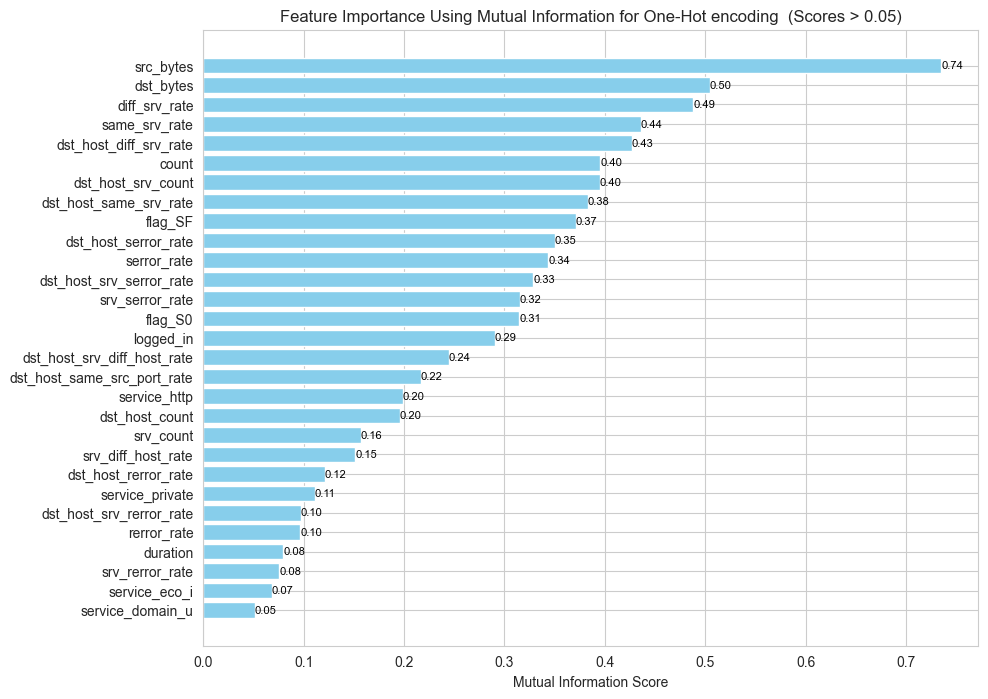

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# 假设 final_data 是您已经有的DataFrame
X = final_data.iloc[:, :-1].values  # 特征数据
y = final_data.iloc[:, -1].values   # 标签数据，已经是编码后的

# 计算特征的互信息得分
mi_scores = mutual_info_classif(X, y)

# 创建特征名称列表，假设最后一列是标签
feature_names = final_data.columns[:-1]

# 创建互信息得分的DataFrame，并排序
mi_scores_df = pd.DataFrame(mi_scores, index=feature_names, columns=['MI Scores'])
mi_scores_df = mi_scores_df.sort_values(by='MI Scores', ascending=True)

# 筛选MI分数大于0.1的特征
filtered_mi_scores_df = mi_scores_df[mi_scores_df['MI Scores'] > 0.05]

# 绘制条形图，只显示MI分数大于0.1的特征
plt.figure(figsize=(10, 8))  # 可以根据实际需要调整尺寸
bars = plt.barh(np.arange(len(filtered_mi_scores_df)), filtered_mi_scores_df['MI Scores'], color='skyblue')

# 在条形图后面添加文本显示MI分数
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f"{bar.get_width():.2f}", 
             va='center', ha='left', fontsize=8, color='black')

plt.yticks(np.arange(len(filtered_mi_scores_df)), filtered_mi_scores_df.index)
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance Using Mutual Information for One-Hot encoding  (Scores > 0.05)')
plt.show()

In [24]:
# 设置互信息得分的阈值
threshold = 0.05  # 根据需要调整这个阈值
# 选择得分高于阈值的特征
selected_features_df = mi_scores_df[mi_scores_df['MI Scores'] > threshold]
# 打印被选中的特征及其互信息得分
print(selected_features_df)
# 只需要特征名称列表
selected_features = selected_features_df.index.tolist()
print("Selected features based on threshold:", selected_features)

                             MI Scores
service_domain_u              0.051390
service_eco_i                 0.068090
srv_rerror_rate               0.075477
duration                      0.079661
rerror_rate                   0.096402
dst_host_srv_rerror_rate      0.096839
service_private               0.110869
dst_host_rerror_rate          0.121099
srv_diff_host_rate            0.151407
srv_count                     0.156858
dst_host_count                0.195908
service_http                  0.198704
dst_host_same_src_port_rate   0.216644
dst_host_srv_diff_host_rate   0.244479
logged_in                     0.290067
flag_S0                       0.314761
srv_serror_rate               0.315035
dst_host_srv_serror_rate      0.328740
serror_rate                   0.343448
dst_host_serror_rate          0.350162
flag_SF                       0.370932
dst_host_same_srv_rate        0.382754
dst_host_srv_count            0.395128
count                         0.395285
dst_host_diff_srv_rate   

In [22]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = final_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)
print('highest_corr:',highest_corr)
selected_features = highest_corr.index.tolist()
print("Corr features based on threshold:", selected_features)

highest_corr: logged_in                 0.504606
same_srv_rate             0.415960
dst_host_srv_count        0.551977
dst_host_same_srv_rate    0.459668
dst_host_diff_srv_rate    0.355136
service_http              0.503690
service_private           0.329745
flag_SF                   0.457038
label                     1.000000
Name: label, dtype: float64
Corr features based on threshold: ['logged_in', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'service_http', 'service_private', 'flag_SF', 'label']


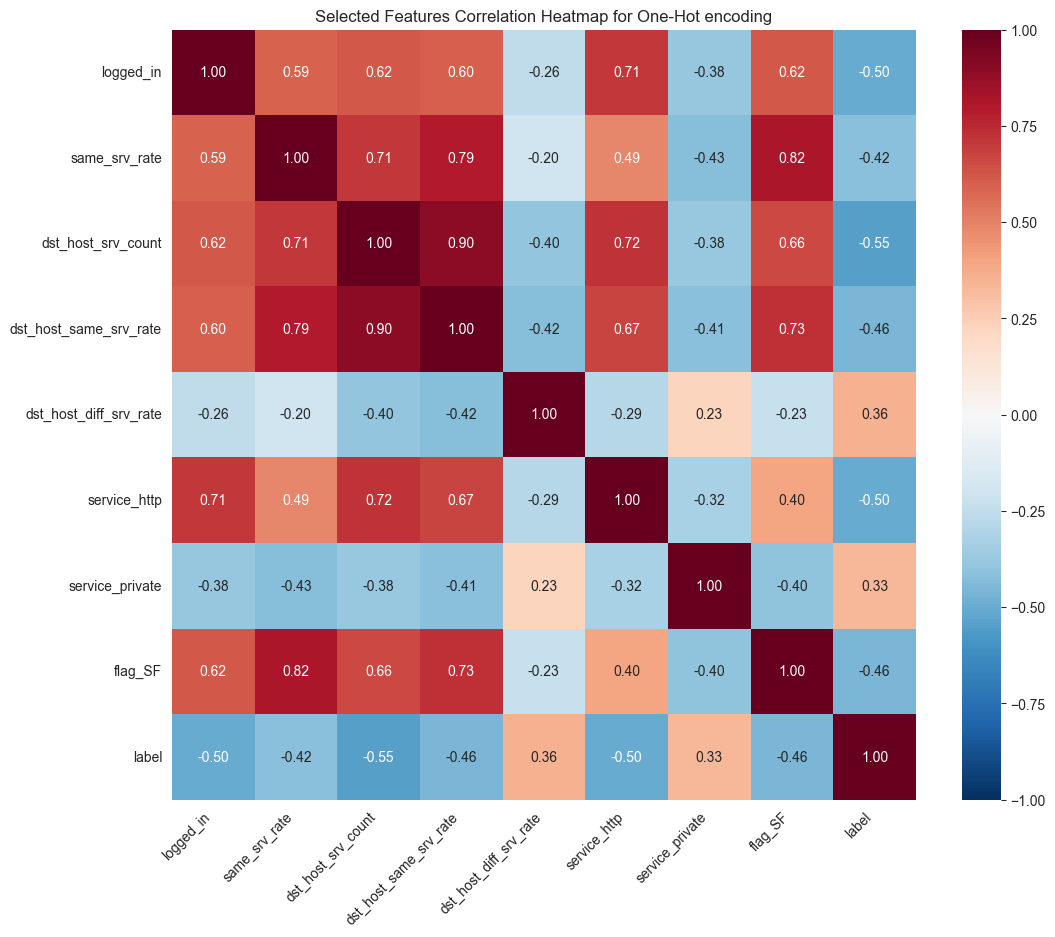

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# 假设你只对特定的几个特征感兴趣
interested_features = ['logged_in', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'service_http', 'service_private', 'flag_SF', 'label']
# 从完整的相关系数矩阵中提取这些特征的相关系数
selected_corr = corr.loc[interested_features, interested_features]
# 设置一个较大的图形尺寸，以便于查看
plt.figure(figsize=(12, 10))
# 创建一个没有注释且以红色渐变表示的热图
# annot=False 代表不显示每个单元格的数值
# cmap='Reds' 使用红色的颜色渐变
sns.heatmap(selected_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0, vmin=-1, vmax=1)
# 调整x轴和y轴的标签，使其更易读
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# 设置图形标题
plt.title('Selected Features Correlation Heatmap for One-Hot encoding')
# 显示图形
plt.show()

In [20]:
selected_data = final_data[['service_domain_u', 'service_eco_i', 'srv_rerror_rate', 'duration', 'rerror_rate', 'dst_host_srv_rerror_rate', 'service_private', 'dst_host_rerror_rate', 'srv_diff_host_rate', 'srv_count', 'dst_host_count', 'service_http', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'logged_in', 'flag_S0', 'srv_serror_rate', 'dst_host_srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'flag_SF', 'dst_host_same_srv_rate', 'dst_host_srv_count', 'count', 'dst_host_diff_srv_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_bytes', 'src_bytes', 'label']]
# selected_data = final_data[['logged_in', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'service_http', 'service_private', 'flag_SF', 'label']]
selected_data.head()

,service_domain_u,service_eco_i,srv_rerror_rate,duration,rerror_rate,dst_host_srv_rerror_rate,service_private,dst_host_rerror_rate,srv_diff_host_rate,srv_count,...,flag_SF,dst_host_same_srv_rate,dst_host_srv_count,count,dst_host_diff_srv_rate,same_srv_rate,diff_srv_rate,dst_bytes,src_bytes,label
0,-0.26778,-0.183696,-0.405192,-0.112481,-0.40646,-0.406815,-0.467387,-0.267151,-0.376389,-0.348310,...,0.808391,-0.813554,-0.849240,-0.696611,-0.278736,0.749108,-0.348092,-0.004614,-0.007346,0
1,-0.26778,-0.183696,-0.405192,-0.112481,-0.40646,-0.406815,-0.467387,-0.422074,-0.376389,-0.361578,...,0.808391,-1.192968,-1.065006,-0.602401,2.657874,-1.358363,0.422462,-0.004614,-0.007409,0
2,-0.26778,-0.183696,-0.405192,-0.112481,-0.40646,-0.406815,2.139552,-0.422074,-0.376389,-0.295238,...,-1.237025,-0.969783,-0.840250,0.339700,-0.175697,-1.427085,0.011499,-0.004614,-0.007436,1
3,-0.26778,-0.183696,-0.405192,-0.112481,-0.40646,-0.376989,-0.467387,-0.422074,-0.376389,-0.308506,...,0.808391,1.038878,1.218511,-0.670918,-0.433294,0.749108,-0.348092,-0.002413,-0.007394,0
4,-0.26778,-0.183696,-0.405192,-0.112481,-0.40646,-0.406815,-0.467387,-0.422074,-0.028744,0.049729,...,0.808391,1.038878,1.218511,-0.456804,-0.433294,0.749108,-0.348092,-0.004501,-0.007400,0


In [ ]:
# # 分离特征和标签
# X = selected_data.iloc[:, :-1].values  # 特征数据
# y = selected_data.iloc[:, -1].values   # 标签数据，已经是编码后的

In [ ]:
# 一些2D和3D的可视化方法
# import umap
# import matplotlib.pyplot as plt
# 
# # UMAP降维
# reducer = umap.UMAP(random_state=42)
# X_reduced = reducer.fit_transform(X)
# # 可视化
# plt.figure(figsize=(12, 10))
# scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='Spectral', s=5)
# plt.title('UMAP projection of the dataset', fontsize=24)
# plt.xlabel('UMAP 1', fontsize=18)
# plt.ylabel('UMAP 2', fontsize=18)
# 
# # 添加颜色条说明
# plt.legend(*scatter.legend_elements(), title="Classes")
# plt.show()
# ***************************************************************************
# import umap
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# 
# # 使用UMAP进行三维降维
# reducer = umap.UMAP(n_components=3, random_state=42)
# X_reduced_umap_3d = reducer.fit_transform(X)
# 
# # 三维可视化
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# 
# # 根据标签绘制不同颜色
# scatter = ax.scatter(X_reduced_umap_3d[:, 0], X_reduced_umap_3d[:, 1], X_reduced_umap_3d[:, 2], c=y, cmap='Spectral', s=5)
# 
# # 添加图例
# legend = ax.legend(*scatter.legend_elements(), title="Classes")
# ax.add_artist(legend)
# 
# plt.title('3D UMAP projection of the dataset')
# plt.show()
# =========================================================================
# =========================================================================
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import seaborn as sns
# # 初始化t-SNE，可以通过调整perplexity和n_iter参数优化结果
# tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
# 
# # 对特征数据X应用t-SNE降维
# X_reduced_tsne = tsne.fit_transform(X)
# plt.figure(figsize=(12, 10))
# scatter = plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap='viridis_r', s=5)
# plt.title('t-SNE projection of the dataset', fontsize=24)
# plt.xlabel('t-SNE 1', fontsize=18)
# plt.ylabel('t-SNE 2', fontsize=18)
# 
# # 使用plt.legend()添加图例
# # 自动生成图例标签和颜色
# plt.legend(*scatter.legend_elements(), title="Classes")
# 
# plt.show()
# ***************************************************************************
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# 
# # 使用t-SNE进行三维降维
# tsne = TSNE(n_components=3, perplexity=30, n_iter=300, random_state=42)
# X_reduced_tsne_3d = tsne.fit_transform(X)
# 
# # 三维可视化
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# 
# # 根据标签绘制不同颜色
# scatter = ax.scatter(X_reduced_tsne_3d[:, 0], X_reduced_tsne_3d[:, 1], X_reduced_tsne_3d[:, 2], c=y, cmap='Spectral', s=5)
# 
# # 添加图例
# legend = ax.legend(*scatter.legend_elements(), title="Classes")
# ax.add_artist(legend)
# 
# plt.title('3D t-SNE projection of the dataset')
# plt.show()
# =========================================================================
# =========================================================================
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# import matplotlib.pyplot as plt
# 
# # 初始化LDA，设置降维到二维
# lda = LDA(n_components=2)
# 
# # 对特征数据X和标签y应用LDA降维
# X_reduced_lda = lda.fit_transform(X, y)
# 
# # 可视化二维投影
# plt.figure(figsize=(12, 10))
# scatter = plt.scatter(X_reduced_lda[:, 0], X_reduced_lda[:, 1], c=y, cmap='viridis_r', s=5)
# plt.title('LDA projection of the dataset to 2D', fontsize=24)
# plt.xlabel('LDA 1', fontsize=18)
# plt.ylabel('LDA 2', fontsize=18)
# plt.legend(*scatter.legend_elements(), title="Classes")
# plt.show()
# ***************************************************************************
# from mpl_toolkits.mplot3d import Axes3D  # 用于三维图
# 
# # 假设类别足够多，可以尝试将LDA的n_components设置为3
# # 注意：实际上这可能不总是可行的，取决于你的类别数量
# lda = LDA(n_components=3)  # 将n_components设置为3
# 
# # 应用LDA降维
# X_reduced_lda_3d = lda.fit_transform(X, y)
# 
# # 可视化三维投影
# fig = plt.figure(figsize=(20, 15))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(X_reduced_lda_3d[:, 0], X_reduced_lda_3d[:, 1], X_reduced_lda_3d[:, 2], c=y, cmap='viridis_r', s=5)
# plt.title('LDA projection of the dataset to 3D', fontsize=24)
# ax.set_xlabel('LDA 1', fontsize=18)
# ax.set_ylabel('LDA 2', fontsize=18)
# ax.set_zlabel('LDA 3', fontsize=18)
# 
# # 为了在3D图中添加图例，需要自定义方法
# legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
# ax.add_artist(legend1)
# 
# plt.show()
# =========================================================================
# =========================================================================
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# 
# # 初始化PCA，设置为2个主成分以进行二维投影
# pca_2d = PCA(n_components=2, random_state=42)
# 
# # 对特征数据X应用PCA降维
# X_reduced_2d = pca_2d.fit_transform(X)
# 
# # 绘制二维投影的散点图
# plt.figure(figsize=(12, 10))
# scatter = plt.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], c=y, cmap='Spectral', s=5)
# plt.title('2D PCA projection of the dataset', fontsize=24)
# plt.xlabel('PCA 1', fontsize=18)
# plt.ylabel('PCA 2', fontsize=18)
# 
# # 使用plt.legend()添加图例
# plt.legend(*scatter.legend_elements(), title="Classes")
# 
# plt.show()
# ***************************************************************************
# from mpl_toolkits.mplot3d import Axes3D
# 
# # 初始化PCA，设置为3个主成分以进行三维投影
# pca_3d = PCA(n_components=3, random_state=42)
# 
# # 对特征数据X应用PCA降维
# X_reduced_3d = pca_3d.fit_transform(X)
# 
# # 绘制三维投影的散点图
# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2], c=y, cmap='Spectral', s=5)
# plt.title('3D PCA projection of the dataset', fontsize=24)
# ax.set_xlabel('PCA 1', fontsize=18)
# ax.set_ylabel('PCA 2', fontsize=18)
# ax.set_zlabel('PCA 3', fontsize=18)
# 
# # 添加图例
# # 由于3D散点图的特殊性，可能需要手动创建图例
# plt.legend(*scatter.legend_elements(), title="Classes")
# plt.show()

In [21]:
X = selected_data.iloc[:, :-1].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
Y = selected_data['label'] # target attribute

In [22]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [23]:
# 统计训练集中每个类别的数量
train_label_counts = y_train.value_counts()
# 统计测试集中每个类别的数量
test_label_counts = y_test.value_counts()
# 打印结果
print("训练集中各类别的数量：\n", train_label_counts)
print("\n测试集中各类别的数量：\n", test_label_counts)

训练集中各类别的数量：
 label
0    57786
1    40017
2    10613
3     2881
4       90
Name: count, dtype: int64

测试集中各类别的数量：
 label
0    19268
1    13370
2     3464
3      999
4       29
Name: count, dtype: int64


In [24]:
from sklearn.svm import SVC
import time

# 初始化SVC模型
svc = SVC(kernel='rbf', class_weight='balanced')

# 训练模型
start = time.time()
# clf = svc.fit(standard_train_X, labels_train)  # 使用全部数据进行训练
clf = svc.fit(X_train, y_train)  # 使用全部数据进行训练
print('训练用时：{0}'.format(time.time() - start))

# 保存模型（如果需要）
# joblib.dump(clf, './model/IDS_model_full_data.m')
# print('Model saved')

训练用时：71.30177283287048


In [25]:
MODEL = clf

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# 使用测试集进行预测
y_pred = clf.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f'accuracy is {accuracy}')

accuracy is 0.9337462967950444


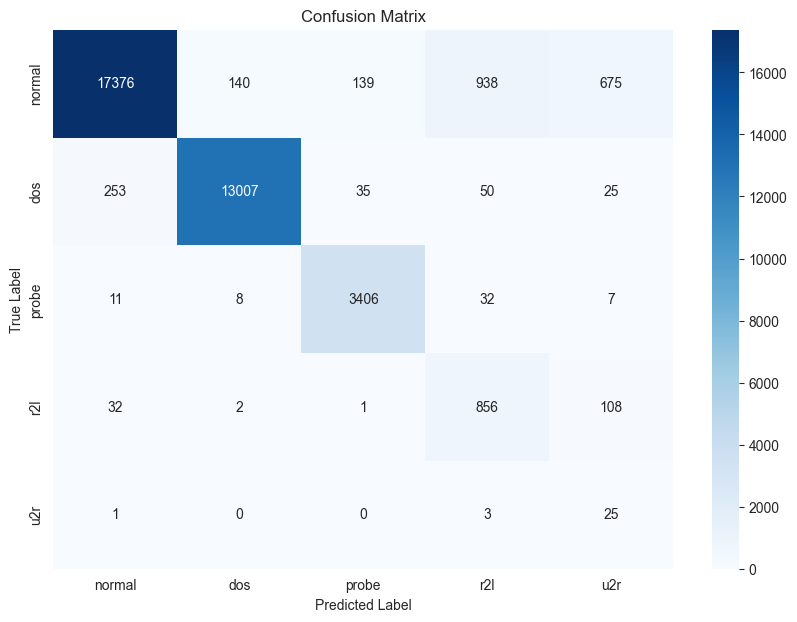

In [27]:
# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
# 获取类别名称（假设 label_mapping 是之前保存的映射）
label_mapping = ['normal', 'dos', 'probe', 'r2l', 'u2r']
class_names = label_mapping
# 可视化混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

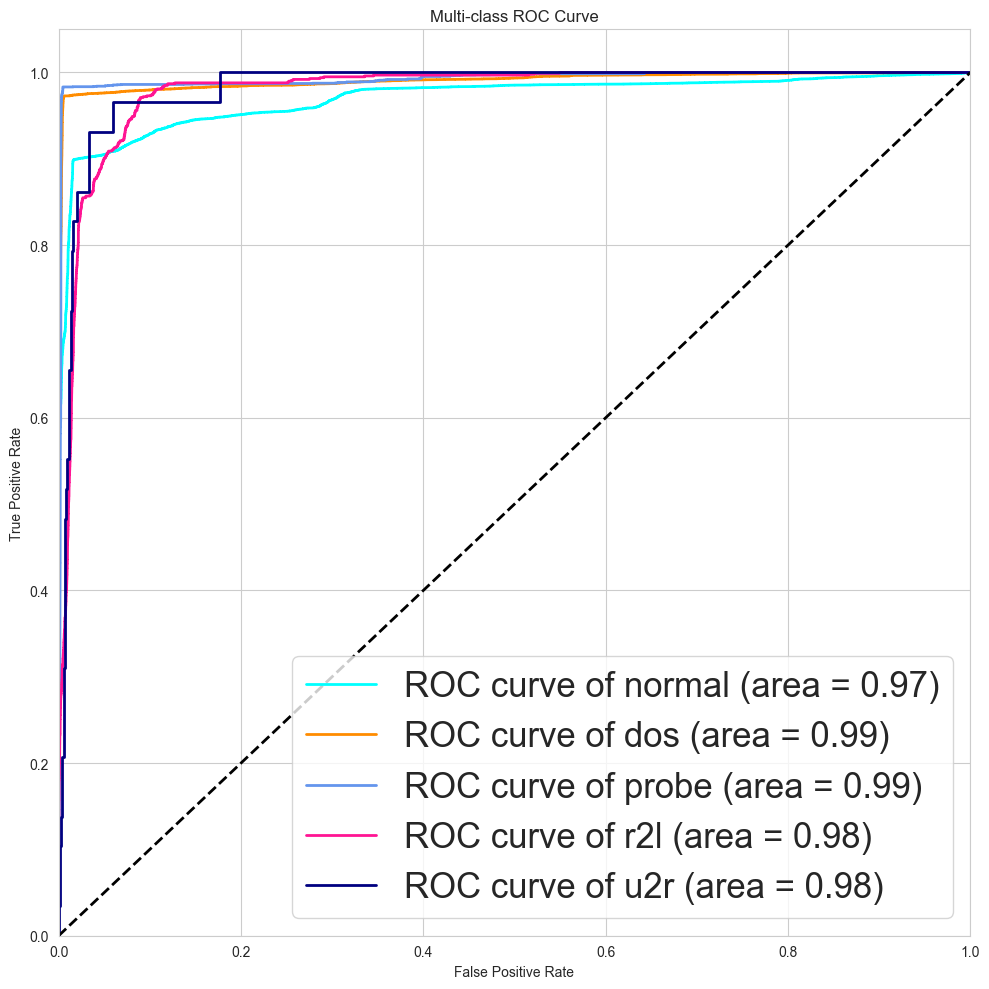

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize

# 假设 clf 是已经训练好的分类器
# 获取测试集上的决策函数得分
y_score = clf.decision_function(X_test)

# 为每个类别进行one-hot编码
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

# 计算ROC曲线和ROC面积
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制所有类别的ROC曲线
plt.figure(figsize=(10, 10))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'navy'])

label_mapping = ['normal', 'dos', 'probe', 'r2l', 'u2r']  # 类别名称

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'.format(label_mapping[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')

# 将图例放到图像外面并放大字体
plt.legend(loc='lower right', fontsize='25')

# 调整布局以防止图例被裁剪
plt.tight_layout()

plt.show()

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# 计算精度、召回率和F1分数
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
def fdr_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    false_discoveries = np.sum(cm, axis=0) - np.diag(cm)  # FP per class
    total_predictions = np.sum(cm, axis=0)  # Total predicted per class
    with np.errstate(divide='ignore', invalid='ignore'):
        fdrs = np.true_divide(false_discoveries, total_predictions)
        fdrs[np.isnan(fdrs)] = 0  # Replace NaN with 0
    return np.mean(fdrs)  # Average FDR over all classes
# 使用这个函数计算FDR
fdr = fdr_score(y_test, y_pred)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"False Discovery Rate: {fdr}")


# 定义MCC分数计算函数
def mcc_score(y_true, y_pred, class_label):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[class_label, class_label]
    tn = np.sum(cm) - np.sum(cm[class_label, :]) - np.sum(cm[:, class_label]) + tp
    fp = np.sum(cm[:, class_label]) - tp
    fn = np.sum(cm[class_label, :]) - tp
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return numerator / denominator if denominator != 0 else 0

# 计算每个类别的MCC并求平均
n_classes = len(np.unique(y_test))  # 确定类别数
mcc_scores = [mcc_score(y_test, y_pred, i) for i in range(n_classes)]
average_mcc = np.mean(mcc_scores)

print(f"Average MCC: {average_mcc}")

Recall: 0.9337462967950444
Precision: 0.9672085609122334
F1 Score: 0.9475639451188353
False Discovery Rate: 0.31835034576717736
Average MCC: 0.7177282651994783


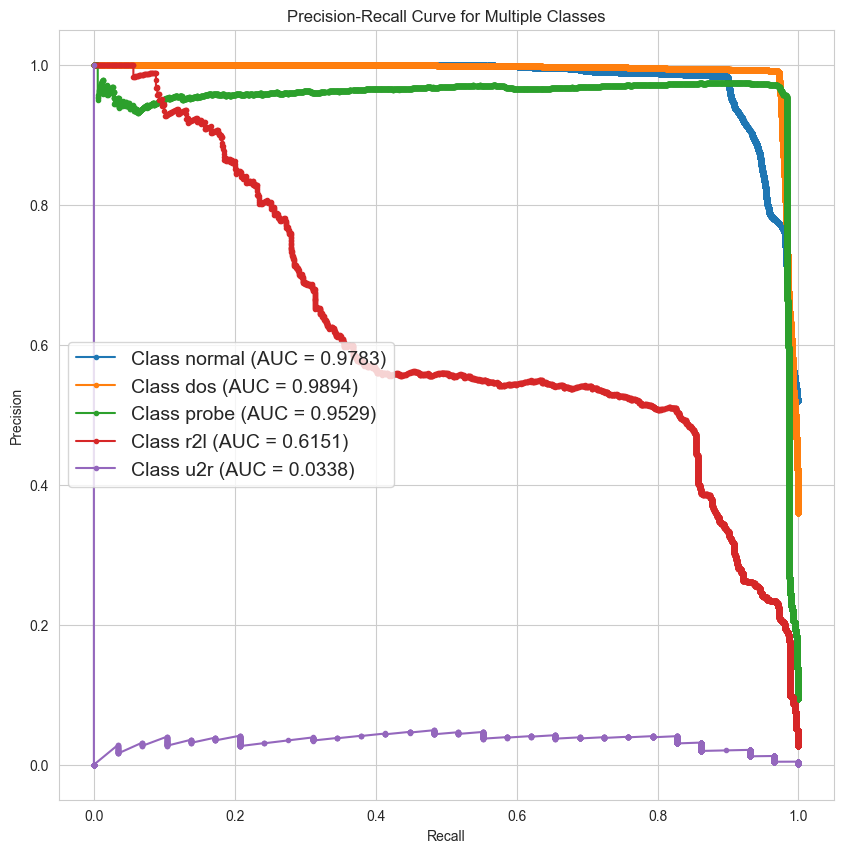

In [39]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# 将真实标签转换为 one-hot 编码
y_true_bin = label_binarize(y_test, classes=np.unique(y_train))

# 确定类别数和类别名称
n_classes = y_true_bin.shape[1]
class_names = label_mapping  # 确保类别名称正确

# 创建一个新的图表
plt.figure(figsize=(10, 10))

# 为每个类别绘制PR曲线，并记录AUC值
auc_scores = []
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_score[:, i])
    auc_score = auc(recall, precision)
    auc_scores.append(auc_score)
    plt.plot(recall, precision, marker='.', label='Class {} (AUC = {:.4f})'.format(class_names[i], auc_score))

# 设置图表的其他属性
plt.title('Precision-Recall Curve for Multiple Classes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(fontsize=14)
# 展示图表
plt.show()